<a href="https://colab.research.google.com/github/Khislatz/DS-Unit-2-Applied-Modeling/blob/master/module4-model-interpretation/Khislat_Zhuraeva_LS_DS_234_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---

# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

## Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

### Links

#### Partial Dependence Plots
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [pdpbox repo](https://github.com/SauceCat/PDPbox) & [docs](https://pdpbox.readthedocs.io/en/latest/)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

#### Shapley Values
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox
    !pip install shap

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
from zipfile import ZipFile 
file_name = "/content/credit-card-approval-prediction.zip"
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
    # extracting all the files 
    zip.extractall() 


File Name                                             Modified             Size
application_record.csv                         2020-03-24 10:05:00     54342959
credit_record.csv                              2020-03-24 10:05:02     15367102


In [3]:
import pandas as pd
import numpy as np
application_df = pd.read_csv('application_record.csv')
credit_df = pd.read_csv('credit_record.csv')
application_df.shape, credit_df.shape

((438557, 18), (1048575, 3))

In [4]:
credit_approval_df = pd.merge(credit_df, application_df)
credit_approval_df.shape

(777715, 20)

In [0]:
credit_approval_df.rename(columns = {'ID':'ID', 'MONTH_BALANCE':'MONTH_BALANCE', 
                              'STATUS':'STATUS','CODE_GENDER':'GENDER', 
                              'FLAG_OWN_CAR':'OWN_CAR', 'FLAG_OWN_REALTY':'OWN_REALTY',
                              'CNT_CHILDREN':'CHILDREN', 'AMT_INCOME_TOTAL':'ANNUAL_INCOME',
                              'NAME_INCOME_TYPE':'INCOME_CATEGORY', 
                              'NAME_EDUCATION_TYPE':'EDUCATION_LEVEL',
                              'NAME_FAMILY_STATUS':'MARITAL_STATUS',
                              'NAME_HOUSING_TYPE':'HOUSING_TYPE',
                              'DAYS_EMPLOYED':'START_DATE_OF_EMPLOYMENT',
                              'FLAG_MOBIL':'CELL_PHONE', 
                              'FLAG_WORK_PHONE': 'WORK_PHONE',
                              'FLAG_EMAIL':'EMAIL', 
                              'CNT_FAM_MEMBERS': 'FAMILY_MEMBERS'}, inplace = True)

In [6]:
credit_approval_df.head()

,ID,MONTHS_BALANCE,STATUS,GENDER,OWN_CAR,OWN_REALTY,CHILDREN,ANNUAL_INCOME,INCOME_CATEGORY,EDUCATION_LEVEL,MARITAL_STATUS,HOUSING_TYPE,DAYS_BIRTH,START_DATE_OF_EMPLOYMENT,CELL_PHONE,WORK_PHONE,FLAG_PHONE,EMAIL,OCCUPATION_TYPE,FAMILY_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


In [7]:
credit_approval_df.isnull().sum()

ID                               0
MONTHS_BALANCE                   0
STATUS                           0
GENDER                           0
OWN_CAR                          0
OWN_REALTY                       0
CHILDREN                         0
ANNUAL_INCOME                    0
INCOME_CATEGORY                  0
EDUCATION_LEVEL                  0
MARITAL_STATUS                   0
HOUSING_TYPE                     0
DAYS_BIRTH                       0
START_DATE_OF_EMPLOYMENT         0
CELL_PHONE                       0
WORK_PHONE                       0
FLAG_PHONE                       0
EMAIL                            0
OCCUPATION_TYPE             240048
FAMILY_MEMBERS                   0
dtype: int64

In [8]:
#baseline 
target = 'STATUS'
credit_approval_df[target].value_counts(normalize=True)

C    0.423723
0    0.373728
X    0.187665
1    0.011247
5    0.001963
2    0.001030
3    0.000368
4    0.000275
Name: STATUS, dtype: float64

In [9]:
baseline = [credit_approval_df[target].mode()[0]]*len(credit_approval_df)
from sklearn.metrics import accuracy_score
accuracy_score(baseline, credit_approval_df[target])

0.4237233433841446

In [10]:
credit_approval_df['GENDER'].value_counts()

F    518851
M    258864
Name: GENDER, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


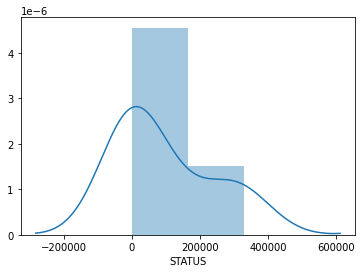

In [11]:
import seaborn as sns
y = credit_approval_df[target].value_counts()
sns.distplot(y);

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(credit_approval_df, train_size=0.80, test_size=0.20, 
                              stratify=credit_approval_df['STATUS'], random_state=42)

train.shape, test.shape

((622172, 20), (155543, 20))

In [13]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['STATUS'], random_state=42)

train.shape, val.shape, test.shape

((497737, 20), (124435, 20), (155543, 20))

In [0]:
def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    X.drop_duplicates(inplace=False)
    # Prevent SettingWithCopyWarning
    X = X.copy()
    X['GENDER'].replace({'M': 0, 'F': 1}, inplace=True)
    X['OWN_CAR'].replace({'N': 0, 'Y': 1}, inplace=True)
    X['OWN_REALTY'].replace({'N': 0, 'Y': 1}, inplace=True)
    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [0]:
target = 'STATUS'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
y_test = test[target]

In [16]:
%%time
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

CPU times: user 127 ms, sys: 99 ms, total: 226 ms
Wall time: 140 ms


In [17]:
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, min_samples_leaf=4)
)

pipeline.fit(X_train, y_train)
print(f'Validation accuracy: {pipeline.score(X_val, y_val)}')

Validation accuracy: 0.8217061116245429


In [18]:
pipeline.named_steps['randomforestclassifier'].feature_importances_

array([0.3287417 , 0.17186004, 0.01359592, 0.01521052, 0.01589195,
       0.0146729 , 0.07833006, 0.02227614, 0.01722387, 0.02126896,
       0.01207362, 0.10870174, 0.08438963, 0.        , 0.01062055,
       0.01094451, 0.00817928, 0.04580281, 0.0202158 ])

In [0]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [20]:
train.dtypes

ID                            int64
MONTHS_BALANCE                int64
STATUS                       object
GENDER                        int64
OWN_CAR                       int64
OWN_REALTY                    int64
CHILDREN                      int64
ANNUAL_INCOME               float64
INCOME_CATEGORY              object
EDUCATION_LEVEL              object
MARITAL_STATUS               object
HOUSING_TYPE                 object
DAYS_BIRTH                    int64
START_DATE_OF_EMPLOYMENT      int64
CELL_PHONE                    int64
WORK_PHONE                    int64
FLAG_PHONE                    int64
EMAIL                         int64
OCCUPATION_TYPE              object
FAMILY_MEMBERS              float64
dtype: object

In [41]:
encoder = ce.ordinal.OrdinalEncoder()
X_train_enc = encoder.fit_transform(X_train)
X_val_enc = encoder.transform(X_val)
X_test_enc = encoder.transform(X_test)

rf_model = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, min_samples_leaf=4)
)

rf_model.fit(X_train_enc, y_train)
print(f'Validation accuracy: {rf_model.score(X_val_enc, y_val)}')

Validation accuracy: 0.8217061116245429


In [0]:
# features = ['ANNUAL_INCOME', 'FAMILY_MEMBERS']

# interaction = pdp_interact(
#     model=pipeline,
#     dataset=X_val,
#     model_features=X_val.columns,
#     features=features
# )

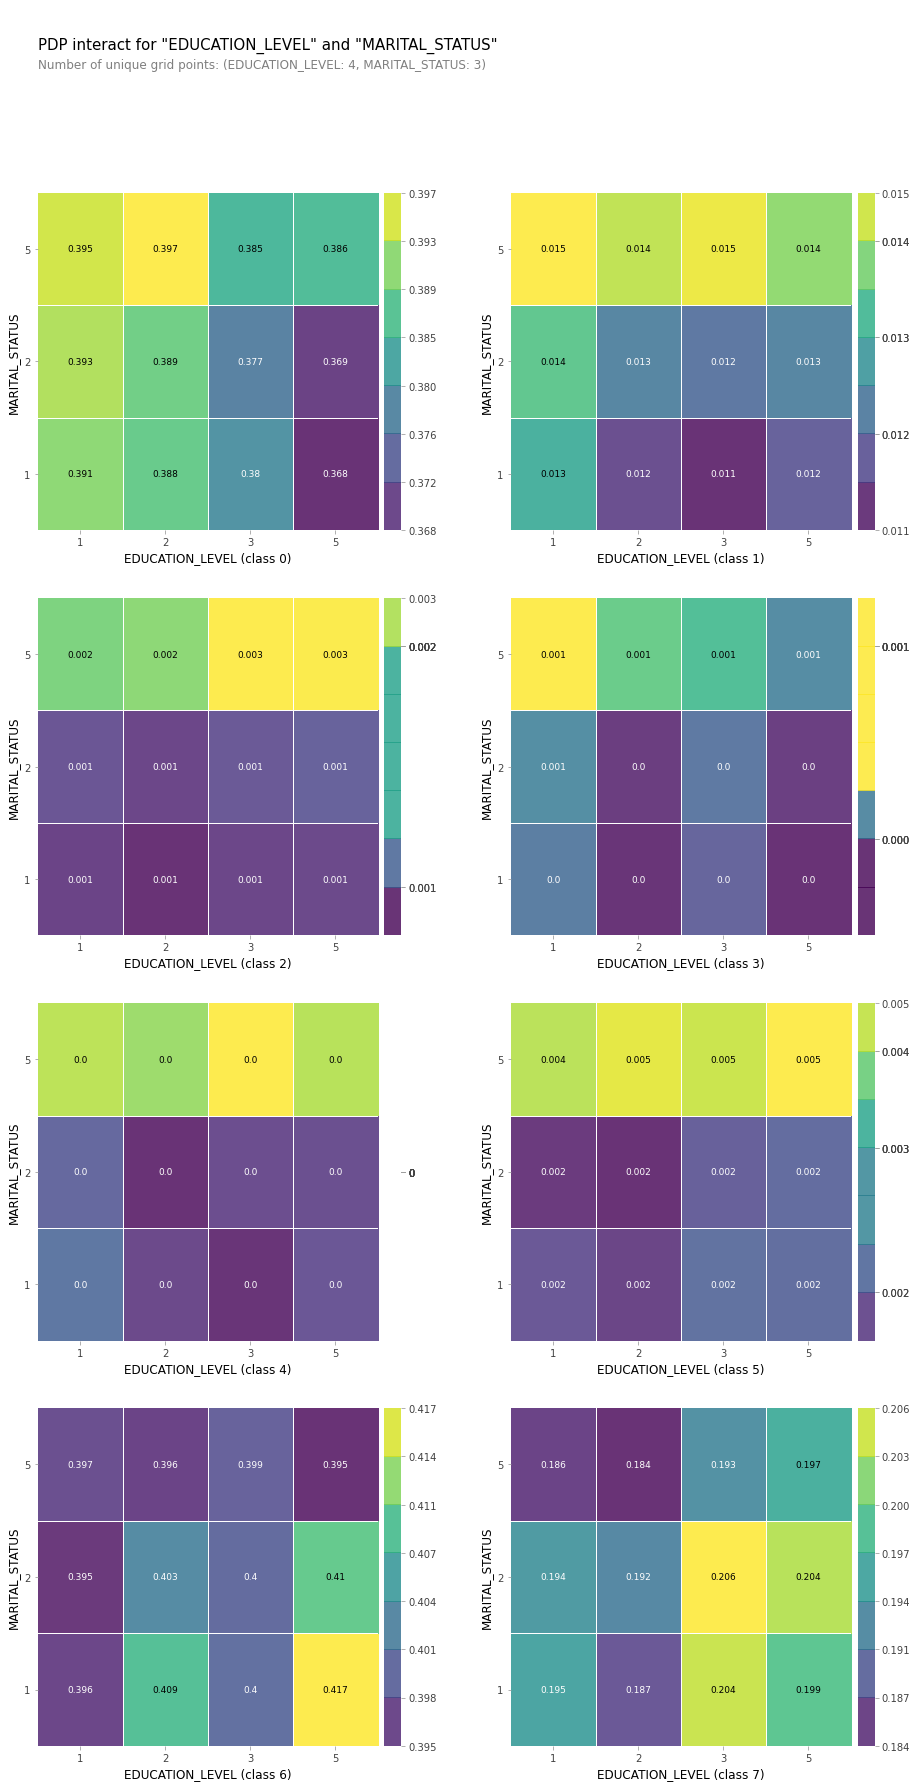

In [46]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
features = ['EDUCATION_LEVEL', 'MARITAL_STATUS']

interaction = pdp_interact(
    model=rf_model, 
    dataset=X_val_enc, 
    model_features=X_val_enc.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);


In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'ANNUAL_INCOME'

isolated = pdp_isolate(
    model=pipeline,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

In [48]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 
    # 'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestclassifier__n_estimators': randint(50, 500),
    'randomforestclassifier__bootstrap': [True, False],
    'randomforestclassifier__min_samples_leaf': randint(2, 10),
    'randomforestclassifier__max_depth':[5, 10, 15, 20, None]

}
search = RandomizedSearchCV(
    rf_model, 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=2, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=42
)

search.fit(X_train_enc, y_train);


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  7.6min


TerminatedWorkerError: ignored

In [0]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation accuracy', search.best_score_)

model1 = search.best_estimator_

In [0]:
row = X_test_inc.iloc[[0]]
row

In [0]:
y_test.iloc[[0]]

In [0]:
model1.predict(row)


In [0]:
import shap

In [51]:
explainer = shap.TreeExplainer(model1)
shap_values = explainer.shap_values(row)
shap_values

SHAPError: ignored